<!-- ls *.ipynb | entr -r jupyter nbconvert 16_intro_to_python_2.ipynb --to slides --post serve --template reveal --SlidesExporter.reveal_number='c/t' --SlidesExporter.reveal_scroll=True -->

# Python for Data Science

## Python for Data Science

---

- pandas is a Python library for data analysis
    - It provides fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. Similar to R's `data.frame` objects.

In [1]:
import pandas as pd
from IPython.display import display, HTML

# Load the datasets
netflix_df = pd.read_csv('https://raw.githubusercontent.com/EEB330/slides/main/16_intro_to_python_2/netflix_titles.csv')
hulu_df = pd.read_csv('https://raw.githubusercontent.com/EEB330/slides/main/16_intro_to_python_2/hulu_titles.csv')
disney_plus_df = pd.read_csv('https://raw.githubusercontent.com/EEB330/slides/main/16_intro_to_python_2/disney_plus_titles.csv')
amazon_prime_df = pd.read_csv('https://raw.githubusercontent.com/EEB330/slides/main/16_intro_to_python_2/amazon_prime_titles.csv')

In [2]:
# Add a new column to each DataFrame that identifies the source of the data!

netflix_df['source'] = 'Netflix'
hulu_df['source'] = 'Hulu'
disney_plus_df['source'] = 'Disney+'
amazon_prime_df['source'] = 'Amazon Prime'

# Concatenate the DataFrames
combined_df = pd.concat([netflix_df, hulu_df, disney_plus_df, amazon_prime_df], ignore_index=True)

display(HTML(combined_df.head(3).to_html()))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,source
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",Netflix


## Python for Data Science

---

- pandas is a Python library for data analysis
    - It provides fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. Similar to R's `data.frame` objects.

- Matplotlib
    - Most common plotting library in Python
- Seaborn
    - Vizualization library based on Matplotlib. It provides high-level interfaces for drawing nice graphics.


### Grouping and plotting

In [3]:
# Function to convert duration to minutes if it's a movie
def duration_to_minutes(duration):
    if not pd.isna(duration) and 'min' in duration:
        return int(duration.split(' ')[0])
    return None

# Function to convert duration to number of seasons if it's a TV show
def duration_to_seasons(duration):
    if not pd.isna(duration) and 'Season' in duration:
        return int(duration.split(' ')[0])
    return None

# Calculate movie duration in minutes and TV show duration in seasons in separate columns
combined_df['movie_duration_minutes'] = combined_df.apply(
    lambda row: duration_to_minutes(row['duration']) if row['type'] == 'Movie' else None, axis=1
)

combined_df['tv_show_duration_seasons'] = combined_df.apply(
    lambda row: duration_to_seasons(row['duration']) if row['type'] == 'TV Show' else None, axis=1
)

In [4]:
# Now you can calculate average movie duration and average TV show seasons
average_movie_duration = combined_df.groupby('source')['movie_duration_minutes'].mean()
average_tv_seasons = combined_df.groupby('source')['tv_show_duration_seasons'].mean()

# Display the results
print("Average Movie Duration (in minutes) by Source:")
print(average_movie_duration)
print("\nAverage TV Show Duration (in seasons) by Source:")
print(average_tv_seasons)

Average Movie Duration (in minutes) by Source:
source
Amazon Prime    91.311876
Disney+         71.910646
Hulu            98.266667
Netflix         99.577187
Name: movie_duration_minutes, dtype: float64

Average TV Show Duration (in seasons) by Source:
source
Amazon Prime    1.723301
Disney+         2.118090
Hulu            2.720579
Netflix         1.764948
Name: tv_show_duration_seasons, dtype: float64


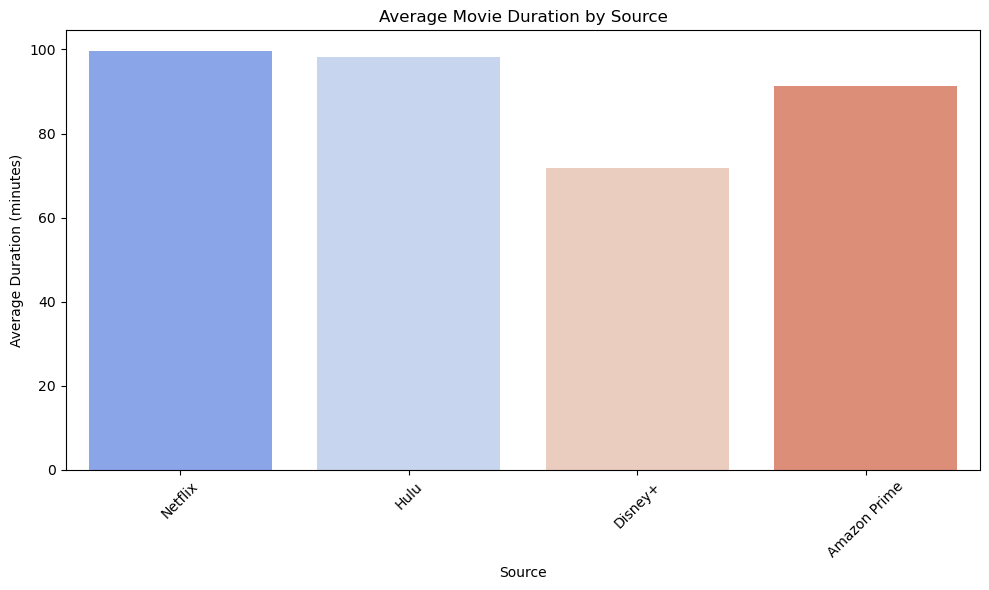

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_df is the DataFrame from previous steps
# Let's drop NA values for movie durations to ensure the plot works
movie_durations = combined_df.dropna(subset=['movie_duration_minutes'])

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot the average movie duration by source using a bar plot
sns.barplot(x='source', y='movie_duration_minutes',hue='source', data=movie_durations, errorbar=None, palette="coolwarm", ax=ax)

ax.set_title('Average Movie Duration by Source')
ax.set_ylabel('Average Duration (minutes)')
ax.set_xlabel('Source')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

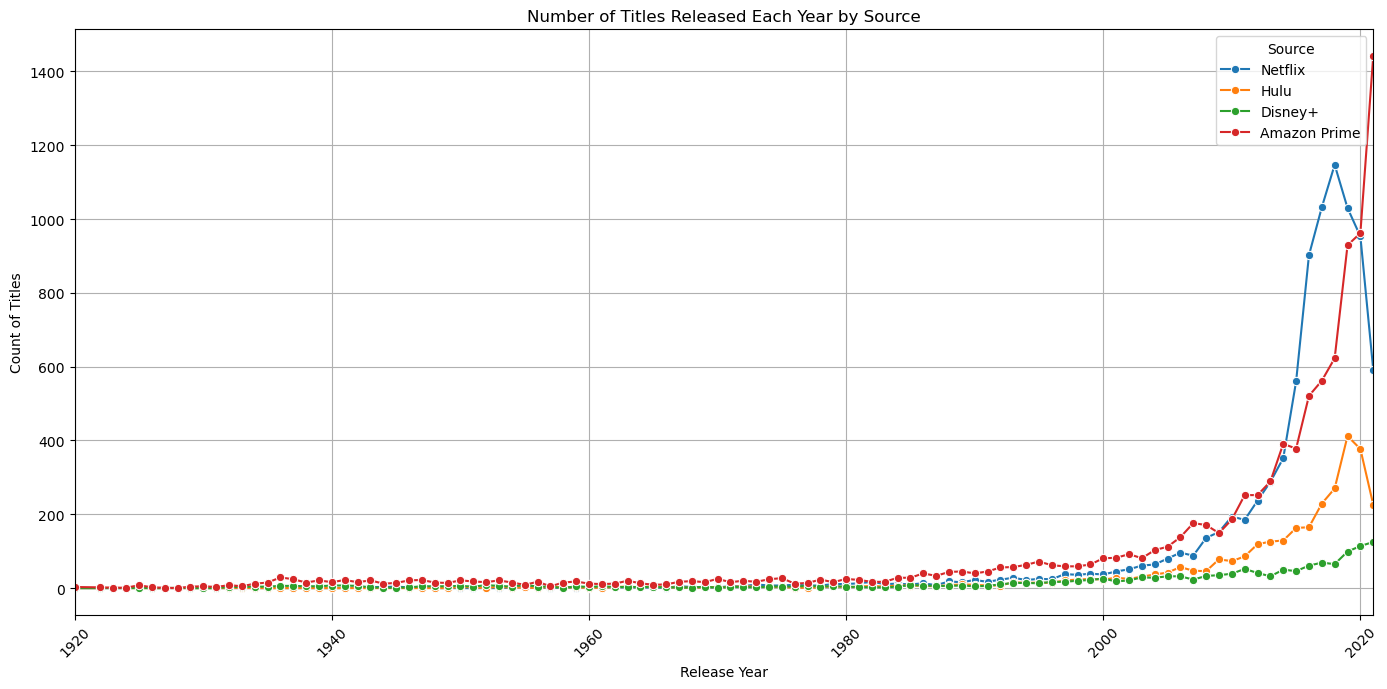

In [6]:
# Group by release year and source and count titles
yearly_releases = combined_df.groupby(['release_year', 'source']).size().reset_index(name='count')

# Pivot the data for plotting
yearly_releases_pivot = yearly_releases.pivot(index='release_year', columns='source', values='count').fillna(0)

# Reset index to get 'release_year' back as a column
yearly_releases_pivot = yearly_releases_pivot.reset_index()

# Plotting
plt.figure(figsize=(14, 7))

# Using seaborn lineplot
sns.lineplot(data=yearly_releases_pivot, x='release_year', y='Netflix', label='Netflix', marker='o')
sns.lineplot(data=yearly_releases_pivot, x='release_year', y='Hulu', label='Hulu', marker='o')
sns.lineplot(data=yearly_releases_pivot, x='release_year', y='Disney+', label='Disney+', marker='o')
sns.lineplot(data=yearly_releases_pivot, x='release_year', y='Amazon Prime', label='Amazon Prime', marker='o')

# Customization
plt.title('Number of Titles Released Each Year by Source')
plt.ylabel('Count of Titles')
plt.xlabel('Release Year')
plt.legend(title='Source')
plt.grid(True)
plt.xlim(yearly_releases_pivot['release_year'].min(), yearly_releases_pivot['release_year'].max())  # Limit x-axis to range of years
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

<div height="3in"></div>